# k-means(K-평균)
- 군집화를 한다 => grouping
- 군진화가 된 상태에서 size에 따라 가까운 거리의 size에 대한 평균을 구한다.
- size를 조절하면서 적절한 평균값을 나타내는 것을 찾는다.
- 군진화를 하여 그룹을 찾는다 => clustering

- 대표적인 군집 알고리즘으로 군집의 중심을 찾는 작업 
- 클러스터(cluster): 군집
- 클러스터링(clustring): 군진화 하는 작업
- k : hyper parameter

<img src="../Data/k-means.png" width="300">

In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import numpy as np 
fruits = np.load("../Data/fruits.npy")
fruits.shape
# 페이지 ,행, 열 

(300, 100, 100)

In [3]:
# 3차원 데이터를 2차원 데이터로 변경
fruits_2d = fruits.reshape(-1, 100 * 100)
fruits_2d.shape

(300, 10000)

# K-means model

In [4]:
from sklearn.cluster import KMeans
kn = KMeans(n_clusters =3, random_state = 42)   # n_clusters=8 (default)
kn.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [5]:
> 비지도학습이므로(정답을 알려주지 않음) fit에 target이 없다.

SyntaxError: invalid syntax (517143115.py, line 1)

In [ ]:
# 군집화 label 출력해보기
# 시스템(내장변수) 라벨이므로 _
kn.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

> 군집화 이므로 target이 뭔지 몰라 숫자값이 표현됨

In [ ]:
# 군집화한 cluster와 각 cluster의 갯수 확인하기
print(np.unique(kn.labels_, return_counts=True))
# return_counts=True = 각 갯수 확인하기 

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


In [17]:
# 시각화 함수
import matplotlib.pyplot as plt

def draw_fruits(arr,ratio=1):
    n = len(arr) # n은 샘플 갯수
    # 한 줄에 10개씩 이미지 그리기, 샘플 갯수를 10으로 나누어 전체 행 갯수 계산
    rows = int(np.ceil(n/10)) # 올림처리
    # 행이 1개이면 열 갯수가 샘플갯수이고 그렇지 않으면 10개
    cols = n if rows < 2 else 10
    
    fig,axs = plt.subplots(rows,cols,figsize=(cols*ratio,rows*ratio), squeeze = False)

    for i in range(rows):
        for j in range(cols):
            if i *10 + j < n: # n개까지만 그린다
                axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
                axs[i,j].axis('off')
    plt.show()

<img src="../Data/squeeze.png" width="500">

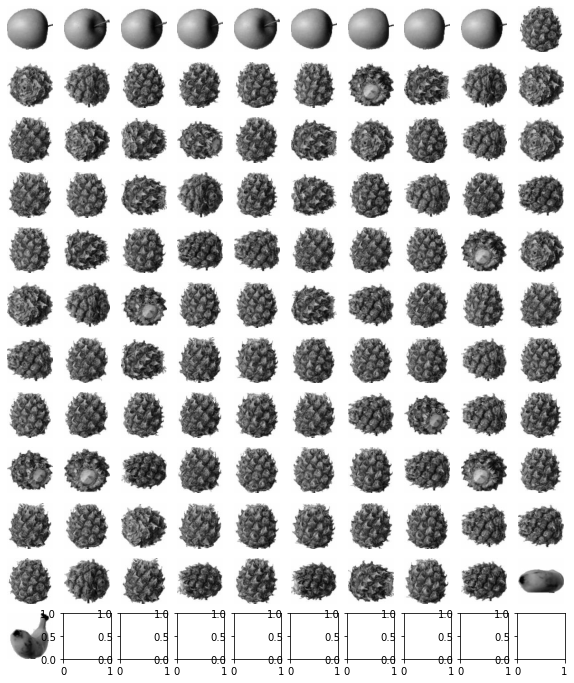

In [18]:
draw_fruits(fruits[kn.labels_ == 0])

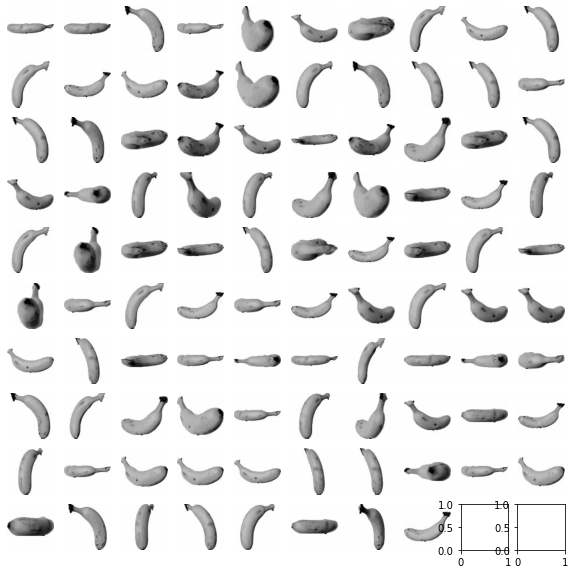

In [19]:
draw_fruits(fruits[kn.labels_ == 1])

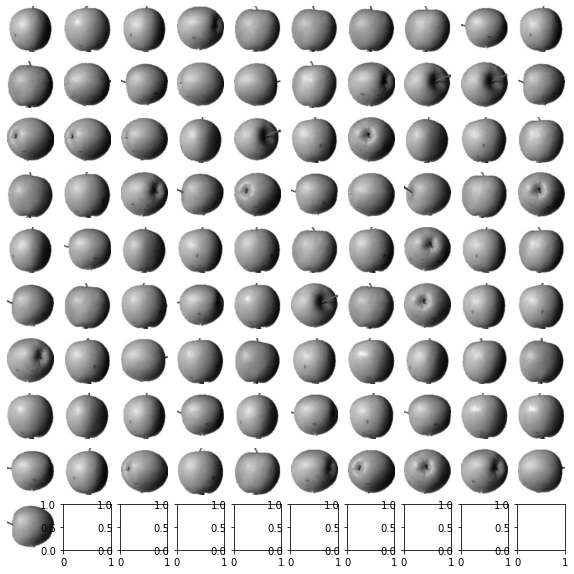

In [20]:
draw_fruits(fruits[kn.labels_ == 2])

> cluster 2번은 사과이다.

### Cluster의 중심

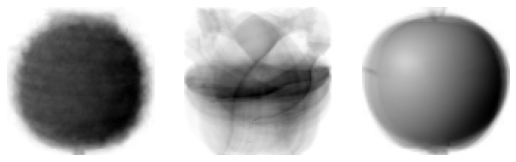

In [22]:
draw_fruits(kn.cluster_centers_.reshape(-1,100,100) , ratio= 3)

In [23]:
# 100번째 클러스터 중심 찾기
print(kn.transform(fruits_2d[100:101]))

[[3374.06980304 8823.8971254  5252.22899617]]


In [24]:
# 100번째 예측 군집값
print(kn.predict(fruits_2d[100:101]))

[0]


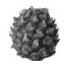

In [26]:
# 그림으로 확인하기
draw_fruits(fruits[100:101])

In [27]:
# 현재 Kn의 반복학습 횟수 (기본값 n_iter_ = 300번)
kn.n_iter_

4

> 기본 반복횟수는 300번이나 현재 4번만에 최적값을 찾았다는 의미

---
### 최적의 k찾기
- k-Means에서 K는 hyper parameter이므로 k값을 찾는 것이 중요하다.

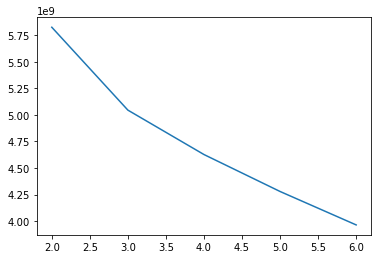

In [29]:
inertia = []
for k in range(2,7):
    kn = KMeans(n_clusters= k, random_state=42)
    kn.fit(fruits_2d)
    inertia.append(kn.inertia_)

plt.plot(range(2,7) , inertia)
plt.show()

> Elbow Method(최적의 군집 수 구하기)로 판단하면 클러스터가 3인 경우가 최적의 군집수이다.

---